In [14]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\DCU\\Main\\full_datasets\\fact_exports_monthly_0202.csv")

In [5]:
df.head()

,id,yearmonth,flow_desc,reporter,partner,unit_weight,product_code,product_desc,trade_weight,trade_value,source
0,43040706,201206,export,ALBANIA,MALTA,kg,202300000,Bovine cuts boneless- frozen,25994.0,0.0,comtrade_all_trade
1,43040704,201206,export,ALBANIA,WORLD,kg,202300000,Bovine cuts boneless- frozen,25994.0,0.0,comtrade_all_trade
2,42920831,201101,export,ANTIGUA AND BARBUDA,DOMINICA,kg,202300000,Bovine cuts boneless- frozen,36.0,233.0,comtrade_all_trade
3,42920837,201102,export,ANTIGUA AND BARBUDA,DOMINICA,kg,202300000,Bovine cuts boneless- frozen,57.0,428.0,comtrade_all_trade
4,42920829,201101,export,ANTIGUA AND BARBUDA,WORLD,kg,202300000,Bovine cuts boneless- frozen,36.0,233.0,comtrade_all_trade


In [6]:
df.trade_value = df.trade_value.fillna(np.mean(df.trade_value))
df.head()

,id,yearmonth,flow_desc,reporter,partner,unit_weight,product_code,product_desc,trade_weight,trade_value,source
0,43040706,201206,export,ALBANIA,MALTA,kg,202300000,Bovine cuts boneless- frozen,25994.0,0.0,comtrade_all_trade
1,43040704,201206,export,ALBANIA,WORLD,kg,202300000,Bovine cuts boneless- frozen,25994.0,0.0,comtrade_all_trade
2,42920831,201101,export,ANTIGUA AND BARBUDA,DOMINICA,kg,202300000,Bovine cuts boneless- frozen,36.0,233.0,comtrade_all_trade
3,42920837,201102,export,ANTIGUA AND BARBUDA,DOMINICA,kg,202300000,Bovine cuts boneless- frozen,57.0,428.0,comtrade_all_trade
4,42920829,201101,export,ANTIGUA AND BARBUDA,WORLD,kg,202300000,Bovine cuts boneless- frozen,36.0,233.0,comtrade_all_trade


In [7]:
df[['str_date']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}/{}".format(s[:4],s[4:6]))

In [8]:
df = df.set_index("str_date")

In [36]:
df[['Year']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}".format(s[0:4]))
df[['Month']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}".format(s[4:6]))
df = df.sort_values(by=["Year","Month"])
df = df.drop("flow_desc",axis=1)
df = df.drop("product_desc",axis=1)

In [42]:
df[['Year','Month']] = df[['Year','Month']].apply(pd.to_numeric)

In [35]:
df["reporter"] = df["reporter"].astype('category').cat.codes
df["partner"] = df["partner"].astype('category').cat.codes
df["source"] = df["source"].astype('category').cat.codes
df["unit_weight"] = df["unit_weight"].astype('category').cat.codes

In [43]:
df.head()

,id,yearmonth,reporter,partner,unit_weight,product_code,trade_weight,trade_value,source,Year,Month
str_date,,,,,,,,,,,
1999/01,44650101,199901,6,201,0,202309000,19500.0,16060.0,1,1999,1
1999/01,44648122,199901,25,112,0,202203000,5600.0,10630.0,1,1999,1
1999/01,44648097,199901,25,156,0,202209000,2400.0,25440.0,1,1999,1
1999/01,44649948,199901,34,73,0,202309000,8500.0,30730.0,1,1999,1
1999/01,44641913,199901,35,20,0,202309000,153900.0,310300.0,1,1999,1


In [16]:
#for i in df.Year.unique():
#    df_year = df[df.Year==i]
#    df_plot = df_year["trade_value"]
#    df_plot.plot()
#    pyplot.show()

In [19]:
#df_dummies =  pd.get_dummies(df, columns=["flow_desc","reporter","partner","source"])

In [23]:
#df_dummies = df_dummies.drop("product_desc",axis=1)
#df_dummies = df_dummies.drop("unit_weight",axis=1)

In [38]:
#df_dummies.head()

In [44]:
df_corr = df.corr()

In [49]:
df = df.dropna()

In [147]:
y = df["trade_value"]
X = df.drop("trade_value",axis=1)

In [148]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# load the iris datasets
#dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 5)
rfe = rfe.fit(X, Y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False False  True False  True]
[5 1 1 1 6 4 3 1 2 1]


In [149]:
df.head()

,id,yearmonth,reporter,partner,unit_weight,product_code,trade_weight,trade_value,source,Year,Month
str_date,,,,,,,,,,,
1999/01,44650101,199901,6,201,0,202309000,19500.0,16060.0,1,1999,1
1999/01,44648122,199901,25,112,0,202203000,5600.0,10630.0,1,1999,1
1999/01,44648097,199901,25,156,0,202209000,2400.0,25440.0,1,1999,1
1999/01,44649948,199901,34,73,0,202309000,8500.0,30730.0,1,1999,1
1999/01,44641913,199901,35,20,0,202309000,153900.0,310300.0,1,1999,1


In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
X = X[["product_code","yearmonth","reporter","partner","trade_weight"]]

In [152]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [154]:
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.fit_transform(y_test)

C:\Users\bhara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\bhara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\bhara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

In [155]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
pred = model.predict(X_test)

In [187]:
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error
mean_sqr = mean_squared_error(y_test,pred)
score = r2_score(y_test,pred)

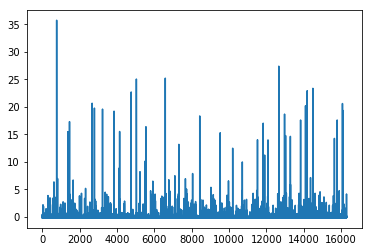

In [159]:
pyplot.plot(pred)

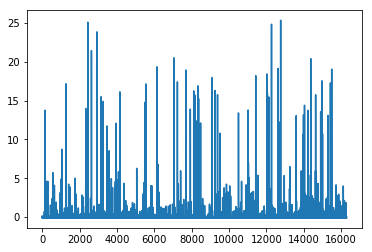

In [122]:
pyplot.plot(y_test)

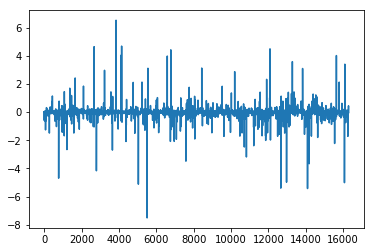

In [160]:
detrended = [y_test[j]-pred[j] for j in range(0, len(pred))]
pyplot.plot(detrended)

In [183]:
def outlierCleaner(predictions, X_train, y_train):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    error = list( (y_train - predictions)**2 )

    cleaned_data = zip(X_train, y_train, error)
    cleaned_data = sorted(cleaned_data, key = lambda tup: tup[2])
    result = int(len(cleaned_data)*0.95)
    cleaned = cleaned_data[:result]
    anomalies = cleaned_data[result:]

    ### your code goes here

    
    return cleaned,anomalies


In [184]:
predictions = model.predict(X_train)
cleaned_data,anomalies = outlierCleaner( predictions, X_train, y_train )

In [190]:
X, y, errors = zip(*cleaned_data)

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

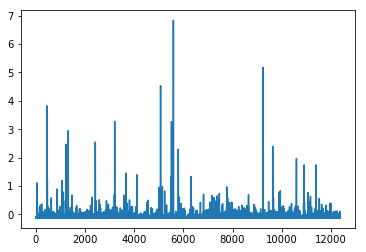

In [195]:
model.fit(X_train,y_train)
pred = model.predict(X_test)

pyplot.plot(pred)

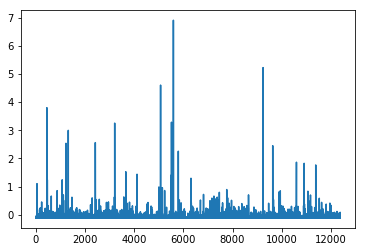

In [194]:
pyplot.plot(y_test)

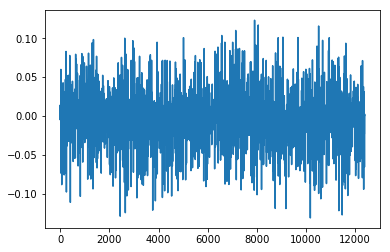

In [196]:
detrended = [y_test[j]-pred[j] for j in range(0, len(pred))]
pyplot.plot(detrended)

In [188]:
print(score)
print(mean_sqr)

0.949383325033
0.0506166749671


In [197]:
if len(cleaned_data) > 0:
    X, y, errors = zip(*cleaned_data)
    try:
        model.fit(X, y)
        #pyplot.plot(X, model.predict(X), color="blue")
    except NameError:
        print("Error")
    #print(model.coef_)
    print(model.score(X_test, y_test))

else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")

0.986592719174


In [200]:
cleaned_data,anomalies = outlierCleaner( model.predict(X_train), X_train, y_train )

0.994776421022


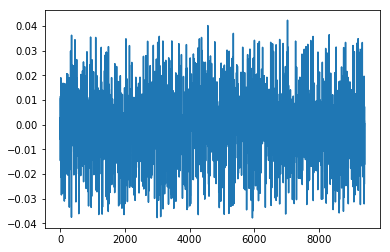

In [203]:
if len(cleaned_data) > 0:
    X, y, errors = zip(*cleaned_data)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    detrended = [y_test[j]-pred[j] for j in range(0, len(pred))]
    pyplot.plot(detrended)
    try:
        model.fit(X_train, y_train)
        #pyplot.plot(X, model.predict(X), color="blue")
    except NameError:
        print("Error")
    #print(model.coef_)
    print(model.score(X_test, y_test))

else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")